# Rodrigo João Cabriz Simões, nº 53154

# Advanced Data Analysis - Assignment 2

This notebook contains the **Assignment 2** of the Advanced Data Analysis course.

The topic of the assignment consists in applying regression on National Health and Nutrition Examination data.

### DEADLINE: 12-October-2022

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. While doing this assignment, you can use or adapt any code from the lectures if you want. 

Students have three grace days that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>
        
### Notebook Instructions
* You only need to deliver this notebook file (notice that, a notebook file extension is filename.ipynb) - Data files must not be submitted
* You don't need to create additional cells. Try to use the ones that are already available
* The notebook should be delivered with the outputs already available


# Dataset

The file children.csv contains a file with two columns. The first column is the age of each child in
months, and the second the weight in Kg. The data is from the National Health and Nutrition Examination
Survey of 2017-2018 and represents a sample of children up to 24 months old.

The following code loads the children.csv file 

In [1]:
# This code cell does not need to be changed
import os
import pandas as pd

dataFileName = os.path.join( "assignment2", "children.csv")
dataDF = pd.read_csv(dataFileName)
dataDF.head()

,age,weight
0,11.0,10.2
1,21.0,10.6
2,7.0,9.3
3,19.0,8.3
4,16.0,9.2


# Assignment

In this assignment, we aim to predict the weight of a children until 24 monthts old based on child age. 

In [2]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import sklearn

## Question 1

In this question, we aim to create a linear regression model do predict the weight of a children based on his/her age. 

### **1.a)** Let's start by plotting the data in a scatter plot.  Is there any correlation between the weight and age of children? (complement visualization with a statistic information). In your opinion, is it reasonable to create a linear regression model to predict the weight of a children? (3 points out of 20). 


             age    weight
age     1.000000  0.879615
weight  0.879615  1.000000


The graph bellow is a great way to justify the high value of correlation - 0.8796145418327413 - there is between the weight and age of children.
As there is a clear upward tendency of the scatter points, a linear regression model would be ideal in this situation.
In fact, we can infer from common knowledge that with the age increase of children, their weight also increase.


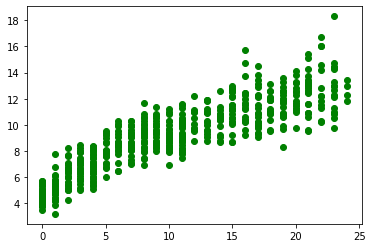

In [3]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on your solution.
age = dataDF[['age']]
weight = dataDF[['weight']]

plt.scatter(age, weight, c = 'g')
print(dataDF.corr())
print("\n")
print("The graph bellow is a great way to justify the high value of correlation -", dataDF.corr().iat[0,1],"- there is between the weight and age of children.")
print("As there is a clear upward tendency of the scatter points, a linear regression model would be ideal in this situation.")
print("In fact, we can infer from common knowledge that with the age increase of children, their weight also increase.")

### **1.b)** Build a linear regression model and estimate the true error (5 out of 20) 

In [4]:
# Adapted poly_model function that returns the errors (train and test), the visualization, ...
# ... the coefficents and interception
seed = 5
def poly_model(degree, viz, coef):
    polynomial_features = PolynomialFeatures(degree)
    
    # Transform the original input data
    poly_trans = polynomial_features.fit_transform(age)
    
    input_df = pd.DataFrame(poly_trans)
    input_df['weight'] = weight # append weight to DF
    
    # Split the data into train and test set
    train_set, test_set = train_test_split(input_df, test_size = 0.2, random_state = seed)

    # Order train data
    train_set = train_set.sort_values(1) 
    
    # Exclude the target variable
    train_input_df = train_set.iloc[:,0:(len(train_set.columns)-1)] 
    y_train = train_set[['weight']]
    
    test_input_df = test_set.iloc[:,0:(len(test_set.columns)-1)] 
    y_test = test_set[['weight']]
    
    # Train Model
    model = linear_model.LinearRegression()
    model.fit(train_input_df, y_train)
    
    # Apply model to Training Set
    poly_model = model.predict(train_input_df)
    
    # Apply model to Test Set
    poly_pred_test = model.predict(test_input_df)
    
    # Compute square error on train data
    error_train = mean_squared_error(y_train, poly_model)
    
    # Compute square error on test data
    error_test = mean_squared_error(y_test, poly_pred_test)
    
    if viz == True:
    # If asked, plot train set only (data used to build the model) and show the model 
        plt.scatter(train_input_df.iloc[:,1], y_train, c = 'g') # train set
        #plt.scatter(test_input_df.iloc[:,1], y_test, c = 'r') # test set

        plt.plot(train_input_df.iloc[:,1],poly_model, color = 'r') #  model
        plt.show()
        
    if coef == True:
    # If asked, return coefficients and interception
        coef = model.coef_
        intercept = model.intercept_
        return [error_train, error_test, coef, intercept]
    else:
        return [error_train, error_test]

[error_train, error_test] = poly_model(1, False, False)
print("The true error, which has its best estimation in the test error, is estimated to be", error_test)

The true error, which has its best estimation in the test error, is estimated to be 1.7803654756800744


### **1.c)** Display in a visualization the data used to build the model as well as the model obtained. Finally,  write the equation of the model obtained (2 out of 20) 

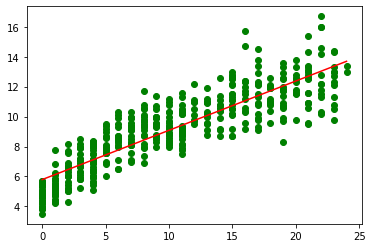

The linear regression model consists on a linear function: weight = 0.329094831276924 * age + 5.792864872153801


In [5]:
# Solve question here. 
[error_train, error_test, coef, intercept] = poly_model(1, True, True)
print("The linear regression model consists on a linear function: weight =", coef[0][1], "* age +", intercept[0])

## Question 2 (10 points out of 20)

Here, we aim to find out if we can create a better model to predict the weigth of children based on their age.

### **2.a)** Evaluate polynomial model of degrees 1 through 10. What degree would you choose in order to have a better model when compared to the model built previously? Why? (6 out of 20)

In [8]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

def trans_data(degree):
    polynomial_features = PolynomialFeatures(degree)
    
    # Transform the original input data
    poly_trans = polynomial_features.fit_transform(age) 
    input_df = pd.DataFrame(poly_trans)
    return input_df

model = linear_model.LinearRegression()

df = pd.DataFrame({'degree' : range(1, 11)})

df['test_error'] = df['degree'].apply(lambda age: cross_val_score(model, trans_data(age), weight, scoring='neg_mean_squared_error', cv=10).mean()) 
df = df.sort_values('test_error', ascending=False).reset_index(drop=True)
lowest_error_deg = df.iat[0,0]
df

,degree,test_error
0,10,-1.400844
1,8,-1.407285
2,3,-1.409529
3,4,-1.412721
4,9,-1.413343
5,7,-1.417251
6,5,-1.419276
7,6,-1.421643
8,2,-1.443860
9,1,-1.636245


##### Comparing the true error we got for the linear regression model (1.7119), we understand that all the polynomial models have a lower test error.
##### As the test error is the best estimation we can get of the true error, all the polynomial models with degree 2 or higher would be a better prediction than the linear model.
##### The one with the lowest test error is the degree 10, the highest degree available, with an error of 1.400844.

### **2.b)** Using the best polynomial degree, find the coefficients of the best curve (2 points out of 20)

In [9]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
    
[error_train, error_test, coef, intercept] = poly_model(lowest_error_deg, False, True)
print(coef)

[[ 0.00000000e+00  5.61057214e-02  1.30638542e+00 -8.47232463e-01
   2.61277671e-01 -4.49375242e-02  4.60277109e-03 -2.86946814e-04
   1.06750415e-05 -2.17784145e-07  1.87461705e-09]]


### **2.c)** Indicate what is the expected error of your model when predicting the weight of children from their age in months. Note that the error should be in Kg, so take careful note of the units you are computing (2 out of 20)

In [10]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
print("The expected error of the model is", error_test**0.5)

The expected error of the model is 1.251232055728043
